# 實作乳癌診斷，並繪製ROC曲線

## 載入套件

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

## 載入資料

In [12]:
data = datasets.load_breast_cancer()

## 資料分割

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(data.data[:,:6], data.target, 
                     test_size=0.20)

## 模型訓練

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), SVC(probability=True))

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

## 模型預測

In [21]:
y_pred_proba = pipe.predict_proba(X_test)
np.around(y_pred_proba, 2)

array([[0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.9 , 0.1 ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.09, 0.91],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.74, 0.26],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.  ,

## 預測值(第2欄)與實際值合併

In [22]:
df = pd.DataFrame({'predict':np.around(y_pred_proba[:,1], 2), 'actual':y_test})
df

,predict,actual
0,1.00,1
1,0.99,1
2,1.00,1
3,0.00,0
4,0.00,0
...,...,...
109,0.01,0
110,0.99,1
111,0.01,0
112,0.70,1


## 依預測值降冪排序

In [23]:
df2=df.sort_values(by='predict', ascending=False)
df2

,predict,actual
0,1.0,1
15,1.0,1
95,1.0,1
92,1.0,1
89,1.0,1
...,...,...
81,0.0,0
73,0.0,0
72,0.0,0
30,0.0,0


## 繪製ROC曲線

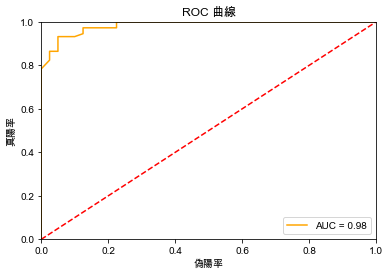

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
auc1 = auc(fpr, tpr)
plt.title('ROC 曲線')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真陽率')
plt.xlabel('偽陽率');

In [25]:
roc_auc_score(df2.actual, df2.predict)

0.9841216216216216